In [2]:
import pandas as pd
from termcolor import colored
import tensorflow as tf
import numpy as np                   
import matplotlib.pyplot as plt      
import random                        
import csv
import keras
import seaborn as sns

from keras.models import Sequential  
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Activation, Flatten # some layers omitted
from tensorflow.python.keras.utils import np_utils
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [3]:
# Import experimental data
exp_data = 'C:/Users/K C/Documents/K C/CV_resume/2023_CV_resume/Interviews/NCC_Japan/ML_test/raw_data/train.csv'
raw_dataset = pd.read_csv(exp_data,
                          na_values='?', comment=',',
                          sep=',', header=0) # header is row 0
print(len(raw_dataset)) # print number of rows
print(len(raw_dataset.columns)) # print number of columns

# Import test data
test_data = 'C:/Users/K C/Documents/K C/CV_resume/2023_CV_resume/Interviews/NCC_Japan/ML_test/raw_data/test.csv'
test_dataset = pd.read_csv(test_data,
                          na_values='?', comment=',',
                          sep=',', header=0) # header is row 0
# print(raw_dataset.head())
print(test_dataset.head())
print(len(test_dataset))
print(len(test_dataset.columns))

3751
1777
         D1        D2    D3   D4        D5        D6        D7        D8  \
0  0.366667  0.611765  0.05  0.0  0.110435  0.803973  0.106075  0.473965   
1  0.100000  0.758175  0.30  0.0  0.180128  0.621378  0.287144  0.503919   
2  0.100000  0.658812  0.10  0.0  0.243421  0.640959  0.312765  0.279784   
3  0.100000  0.655752  0.10  0.0  0.226978  0.776996  0.150657  0.336948   
4  0.000000  0.484851  0.00  0.0  0.561200  0.771463  0.244287  0.293096   

         D9       D10  ...  D1767  D1768  D1769  D1770  D1771  D1772  D1773  \
0  0.835617  0.106452  ...      1      1      1      1      0      1      0   
1  0.674919  0.403616  ...      0      0      0      0      0      0      0   
2  0.686775  0.280301  ...      0      0      0      0      0      0      0   
3  0.802121  0.125608  ...      0      0      0      0      0      0      0   
4  0.717575  0.230842  ...      0      0      0      0      0      0      0   

   D1774  D1775  D1776  
0      0      1      0  
1      0

In [4]:
# Check for NA
# print(raw_dataset.isna().sum())
# print(test_dataset.isna().sum())

# Remove NA; no NA found
raw_dataset_no_na = raw_dataset.dropna()
print(len(raw_dataset_no_na))
print(len(raw_dataset_no_na.columns))

test_dataset_no_na = test_dataset.dropna()
print(len(test_dataset_no_na))
print(len(test_dataset_no_na.columns))

3751
1777
2501
1776


In [5]:
# Separate by Activity = 0 and Activity = 1
activity_0 = raw_dataset.loc[raw_dataset['Activity'] == 0 ]
activity_1 = raw_dataset.loc[raw_dataset['Activity'] == 1 ]

print(activity_0.head())
print(activity_1.head())

    Activity        D1        D2   D3    D4        D5        D6        D7  \
4          0  0.100000  0.517794  0.0  0.00  0.494734  0.781422  0.154361   
5          0  0.133333  0.771035  0.2  0.25  0.122153  0.677398  0.267224   
9          0  0.100000  0.768150  0.1  0.25  0.262299  0.598972  0.377065   
11         0  0.166667  0.563907  0.0  0.25  0.254419  0.756516  0.228250   
19         0  0.033300  0.675038  0.1  0.00  0.235896  0.657470  0.212516   

          D8        D9  ...  D1767  D1768  D1769  D1770  D1771  D1772  D1773  \
4   0.303809  0.812646  ...      0      0      0      0      0      0      0   
5   0.611112  0.701421  ...      0      0      0      0      0      0      0   
9   0.394514  0.673797  ...      0      0      0      0      0      0      0   
11  0.444385  0.858130  ...      0      0      0      0      0      0      0   
19  0.561463  0.688336  ...      0      0      0      0      0      0      0   

    D1774  D1775  D1776  
4       0      0      0  
5   

In [6]:
# Split dataset into training and testing dataset
train_dataset = raw_dataset.sample(frac=0.8)
test_dataset = raw_dataset.drop(train_dataset.index)

           count      mean       std       min       25%       50%       75%  \
Activity  1717.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
D1        1717.0  0.084469  0.086652  0.000000  0.033300  0.066700  0.100000   
D2        1717.0  0.579853  0.105104  0.282128  0.506263  0.574079  0.650085   
D3        1717.0  0.053873  0.070325  0.000000  0.000000  0.050000  0.100000   
D4        1717.0  0.044554  0.127090  0.000000  0.000000  0.000000  0.000000   
...          ...       ...       ...       ...       ...       ...       ...   
D1772     1717.0  0.015143  0.122156  0.000000  0.000000  0.000000  0.000000   
D1773     1717.0  0.008736  0.093085  0.000000  0.000000  0.000000  0.000000   
D1774     1717.0  0.011066  0.104641  0.000000  0.000000  0.000000  0.000000   
D1775     1717.0  0.012813  0.112500  0.000000  0.000000  0.000000  0.000000   
D1776     1717.0  0.008736  0.093085  0.000000  0.000000  0.000000  0.000000   

               max  
Activity  0.000000

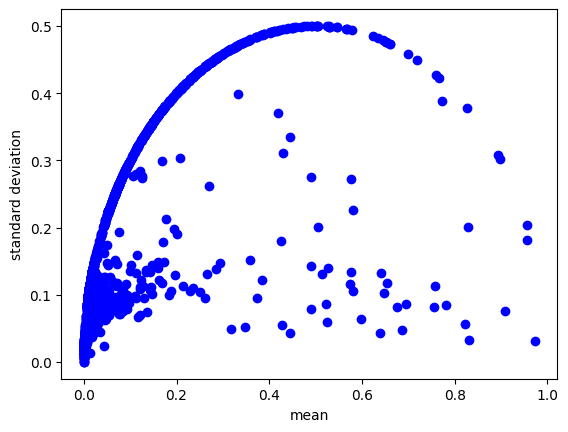

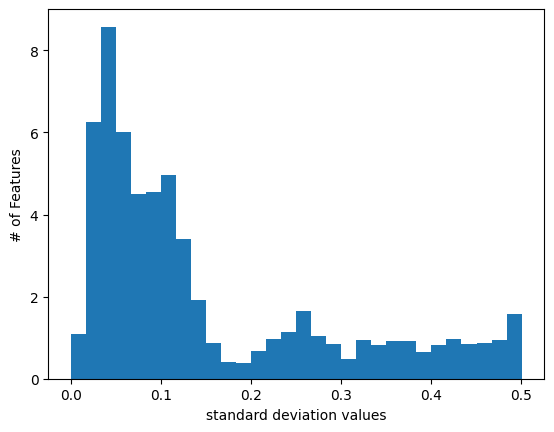

In [7]:
# Activity 0 summary stats
activity_0_summary = activity_0.describe().transpose()
print(activity_0_summary)

# Scatterplot
plt.scatter(activity_0_summary['mean'], activity_0_summary['std'], c ="blue")
plt.ylabel('standard deviation')
plt.xlabel('mean')
plt.show()

# Histogram of standard deviation
plt.hist(activity_0_summary['std'], density=True, bins=30)  # density=False would make counts
plt.ylabel('# of Features')
plt.xlabel('standard deviation values')

activity_0_high_std = activity_0_summary.loc[activity_0_summary['std'] > 0.3 ]

           count      mean       std       min      25%       50%       75%  \
Activity  2034.0  1.000000  0.000000  1.000000  1.00000  1.000000  1.000000   
D1        2034.0  0.070599  0.073322  0.000000  0.03330  0.066700  0.100000   
D2        2034.0  0.603059  0.105357  0.358867  0.53285  0.597146  0.679735   
D3        2034.0  0.080187  0.082766  0.000000  0.00000  0.050000  0.100000   
D4        2034.0  0.034292  0.105308  0.000000  0.00000  0.000000  0.000000   
...          ...       ...       ...       ...      ...       ...       ...   
D1772     2034.0  0.018191  0.133674  0.000000  0.00000  0.000000  0.000000   
D1773     2034.0  0.015241  0.122540  0.000000  0.00000  0.000000  0.000000   
D1774     2034.0  0.012291  0.110209  0.000000  0.00000  0.000000  0.000000   
D1775     2034.0  0.026549  0.160800  0.000000  0.00000  0.000000  0.000000   
D1776     2034.0  0.013274  0.114475  0.000000  0.00000  0.000000  0.000000   

               max  
Activity  1.000000  
D1       

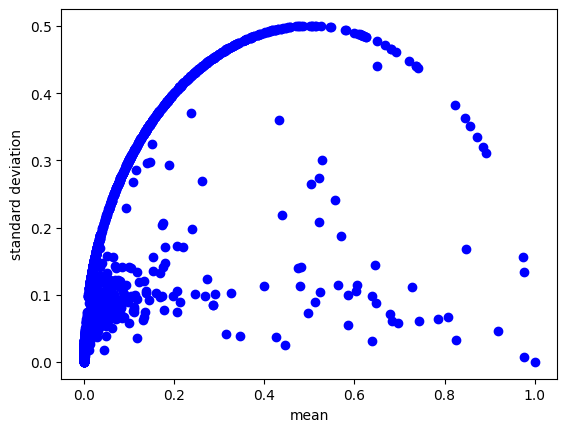

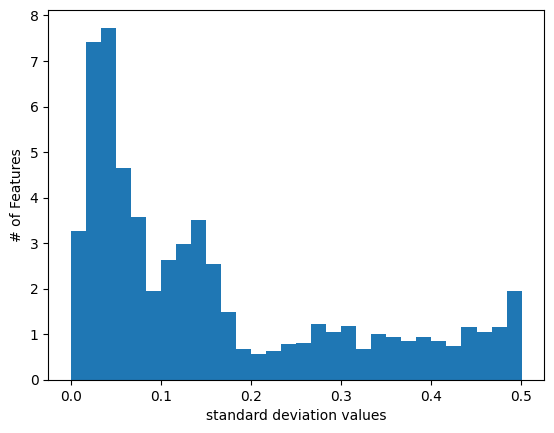

In [8]:
# Activity 1 summary stats
activity_1_summary = activity_1.describe().transpose()
print(activity_1_summary)

# Scatterplot
plt.scatter(activity_1_summary['mean'], activity_1_summary['std'], c ="blue")
plt.ylabel('standard deviation')
plt.xlabel('mean')
plt.show()

# Histogram
plt.hist(activity_1_summary['std'], density=True, bins=30)  # density=False would make counts
plt.ylabel('# of Features')
plt.xlabel('standard deviation values')

activity_1_high_std = activity_1_summary.loc[activity_0_summary['std'] > 0.3 ]

In [9]:
shared_high_std = list(set(activity_0_high_std.index) & set(activity_1_high_std.index))
# print(shared_high_std)
print(len(shared_high_std))

train_dataset_subset = raw_dataset.drop(columns=shared_high_std)
print(len(raw_dataset))
print(len(raw_dataset.columns))
print(len(train_dataset_subset))
print(len(train_dataset_subset.columns))

318
3751
1777
3751
1459


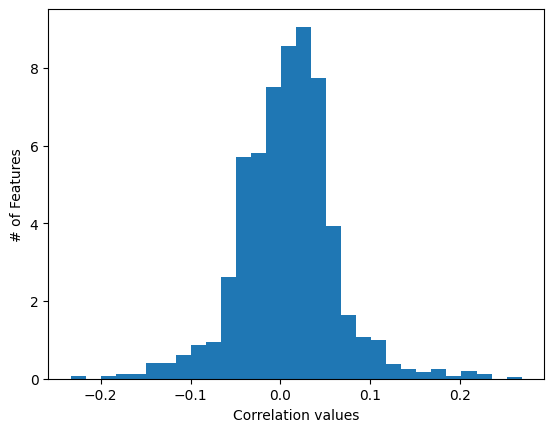

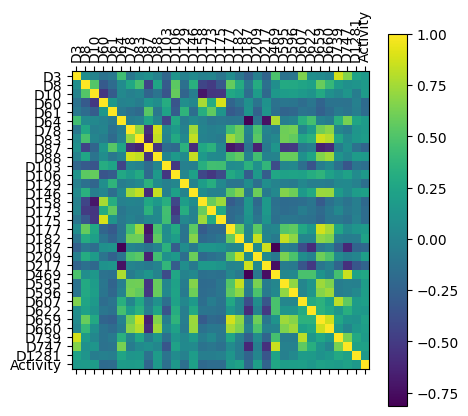

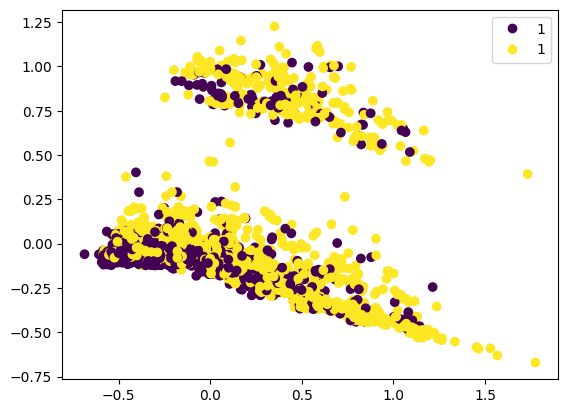

In [15]:
# Identify which features are correlated with activity
# 1. Calculate correlation for each Feature to Variable
# 2. Then plot histogram of correlation values

# Split features (x_train) and variable (y_train)
x_data, y_data = train_dataset_subset.filter(regex='^D'), train_dataset_subset.filter(regex='Activity')

plot_input = [] # list to store correlation values
correlated_features = [] # list to store slightly correlated features

# For each Feature (column) in x_data, calculate correlation to Variable ("Activity")
for col in x_data.columns: # col is the column name in x_data

    # Calculate correlation between Activity (y-value) and Feature (x-value)
    corr_res = train_dataset_subset['Activity'].corr(train_dataset_subset[col])

    # Append correlation value to plot_input vector
    plot_input.append(corr_res)

    # If correlation is less than -0.2 or greater than 0.2, print Feature name and correlation value
    if corr_res >= 0.15 or corr_res <= -0.15:
        # print(col, corr_res)
        correlated_features.append(col) # save slightly correlated features to list
    
# Histogram of correlation values
plt.hist(plot_input, density=True, bins=30)  # density=False would make counts
plt.ylabel('# of Features')
plt.xlabel('Correlation values')

# Heatmap of correlation values
heatmap_col = correlated_features.copy() # copy correlated_features object
heatmap_col += ['Activity'] # append "Activity" string to list of columns
heatmap_input = train_dataset_subset[heatmap_col] # obtain columns representing features of interest and Activity 
plt.matshow(heatmap_input.corr())
plt.xticks(np.arange(len(heatmap_col)), heatmap_input.columns, rotation=90)
plt.yticks(np.arange(len(heatmap_col)), heatmap_input.columns, rotation=0)
plt.colorbar()
plt.show()

# PCA
pca_labels = list(map(str, train_dataset_subset['Activity']))
pca = PCA()
Xt = pca.fit_transform(train_dataset_subset[correlated_features])
plot = plt.scatter(Xt[:,0], Xt[:,1], c=train_dataset_subset['Activity'])
plt.legend(handles=plot.legend_elements()[0], labels=pca_labels)
plt.show()

In [16]:
# Linear regression
scores = []
coefs = []
for i in range(100):

    # Split training dataset into training data and test data
    x_train, x_test, y_train, y_test = train_test_split(train_dataset_subset[correlated_features], train_dataset_subset['Activity'], test_size=0.2, shuffle= True)

    # Fit to linear regression
    lineReg = LinearRegression()
    lineReg.fit(x_train, y_train)
    scores.append(lineReg.score(x_test, y_test))
    coefs.append(lineReg.coef_)

print('Linear Regression')
print(np.mean(scores))

Linear Regression
0.18716423809522945


In [17]:
model_x_data = x_data[correlated_features]
x_train, x_test, y_train, y_test = train_test_split(train_dataset_subset[correlated_features], train_dataset_subset['Activity'], test_size=0.2, shuffle= True)

# Number of features of interest
num_features = len(x_train.columns)

# Normalize
x_train = np.array(x_train)
normalizer = layers.Normalization(input_shape=[num_features,], axis=None)
normalizer.adapt(x_train)

# Model
model = tf.keras.Sequential([
    normalizer,
    layers.Flatten(),
    layers.Dense(units=1)
])

model.summary()

# Predict
model.predict(x_test)

# Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

# Train
history = model.fit(
    train_dataset_subset[correlated_features],
    train_dataset_subset['Activity'],
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 32)                3         
 tion)                                                           
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 36 (148.00 Byte)
Trainable params: 33 (132.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________
24/24 [==============================] - 0s 1ms/step


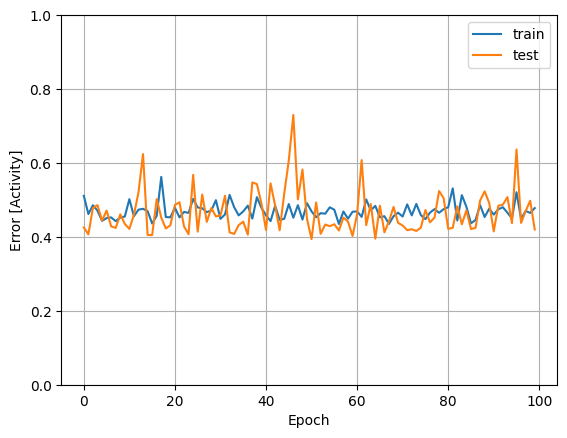

In [18]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='test')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Activity]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

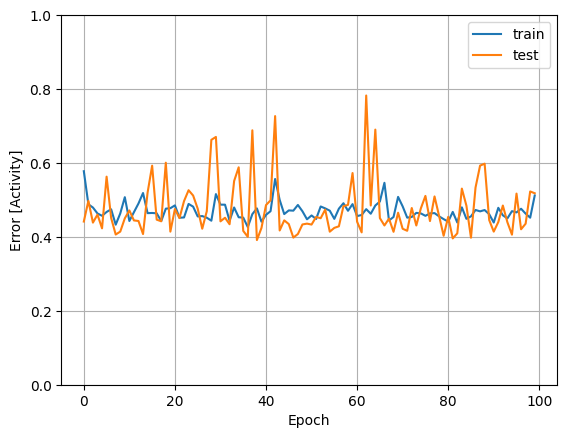

In [150]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='test')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Activity]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [39]:
# Subset test dataset by features of interest (features with "high" correlation)
test_dataset_subset = test_dataset[correlated_features]
lineReg.predict(test_dataset_subset)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [40]:
%%time
history = model.fit(
    raw_dataset[correlated_features],
    raw_dataset['Activity'],
    epochs=10,
    verbose=0,
    validation_split = 0.2)

CPU times: total: 3.06 s
Wall time: 2.61 s


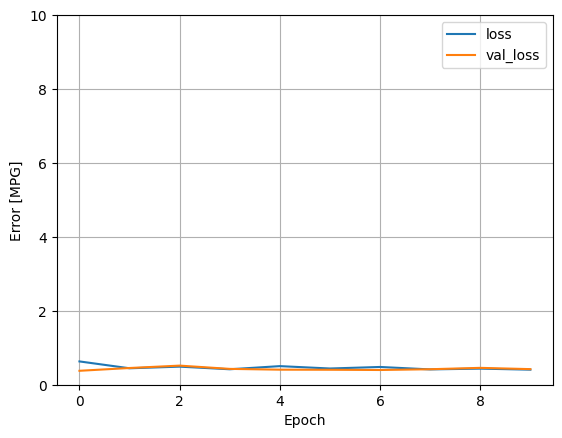

In [42]:
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)